In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [2]:
colors = [
    "#277F8E",
    "#EDB183",
    "#3A2E39",
    "#F4D8CD",
    "#F15152",
    "#FFBA08",
    "#92374D",
    "#59FFA0",
    "#B4ADEA",
    "#B27C66",
    "#230C33",
    "#13293D",
]
custom_palette = sns.color_palette(colors)
custom_palette

[(0.15294117647058825, 0.4980392156862745, 0.5568627450980392),
 (0.9294117647058824, 0.6941176470588235, 0.5137254901960784),
 (0.22745098039215686, 0.1803921568627451, 0.2235294117647059),
 (0.9568627450980393, 0.8470588235294118, 0.803921568627451),
 (0.9450980392156862, 0.3176470588235294, 0.3215686274509804),
 (1.0, 0.7294117647058823, 0.03137254901960784),
 (0.5725490196078431, 0.21568627450980393, 0.30196078431372547),
 (0.34901960784313724, 1.0, 0.6274509803921569),
 (0.7058823529411765, 0.6784313725490196, 0.9176470588235294),
 (0.6980392156862745, 0.48627450980392156, 0.4),
 (0.13725490196078433, 0.047058823529411764, 0.2),
 (0.07450980392156863, 0.1607843137254902, 0.23921568627450981)]

In [3]:
df = pd.read_csv(
    "../conjscan/all_best_solution_summary_derep.tsv", sep="\t", comment="#"
)
df.columns = [i.split("/")[-1] for i in df.columns]
df.head()

,replicon,MOB,T4SS_typeB,T4SS_typeC,T4SS_typeF,T4SS_typeFA,T4SS_typeFATA,T4SS_typeG,T4SS_typeI,T4SS_typeT,dCONJ_typeB,dCONJ_typeC,dCONJ_typeF,dCONJ_typeFA,dCONJ_typeFATA,dCONJ_typeG,dCONJ_typeI,dCONJ_typeT
0,2088090015|GPICI_8721071,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2088090015|GPICI_8837489,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2088090015|GPICI_8880022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2088090015|GPICI_8946463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2088090015|GPICI_9100369,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_lengths = pd.read_csv(
    "../ptu_derep/derep_plasmids_lengths.tsv",
    sep="\t",
)

df_lengths["Plasmid"] = df_lengths["Plasmid"].apply(
    lambda x: x.split("|")[0] if "IMGPR" in x else x
)
df_lengths.set_index("Plasmid", inplace=True)
df_lengths.head()

,length
Plasmid,
2088090014|GPIPI_16944593,5584
2088090014|GPIPI_16884012,8233
2088090014|GPIPI_17035422,5654
2088090014|GPIPI_17320127,5097
2088090014|GPIPI_16557027,6619


In [ ]:
df = df.join(df_lengths, on="replicon")

df.head()

,replicon,MOB,T4SS_typeB,T4SS_typeC,T4SS_typeF,T4SS_typeFA,T4SS_typeFATA,T4SS_typeG,T4SS_typeI,T4SS_typeT,dCONJ_typeB,dCONJ_typeC,dCONJ_typeF,dCONJ_typeFA,dCONJ_typeFATA,dCONJ_typeG,dCONJ_typeI,dCONJ_typeT,length
0,2088090015|GPICI_8721071,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9738
1,2088090015|GPICI_8837489,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10843
2,2088090015|GPICI_8880022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25248
3,2088090015|GPICI_8946463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9983
4,2088090015|GPICI_9100369,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9763


In [ ]:
ptus = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)

ptus.head()

,1,2
0,,
PTU-00000,3300056587|Ga0562382_00532,"3300056587|Ga0562382_00532,3300041809|Ga045567..."
PTU-00001,3300056791|Ga0562384_00281,"3300056791|Ga0562384_00281,3300054973|Ga049542..."
PTU-00002,3300046709|Ga0495471_0000157,"3300046709|Ga0495471_0000157,3300046788|Ga0495..."
PTU-00003,3300046559|Ga0495667_0000358,"3300046559|Ga0495667_0000358,3300036401|Ga0373..."
PTU-00004,3300056834|Ga0562381_00901,"3300056834|Ga0562381_00901,3300056587|Ga056238..."


In [7]:
ptus_mapping = {}
for idx in ptus.index:
    for plasmid in ptus.loc[idx, 2].split(","):
        if plasmid.startswith("IMGPR"):
            ptus_mapping[plasmid.split("|")[0]] = idx
        else:
            ptus_mapping[plasmid] = idx

In [8]:
df["origin"] = df["replicon"].apply(
    lambda x: (
        "Isolate"
        if any(prefix in x for prefix in ["IMGPR", "PLSDB", "Refsoil"])
        else "Meta"
    )
)

In [9]:
# df_host[df_host['Plasmid'].str.contains('IMGPR')]

In [10]:
df_host = pd.read_csv(
    "../crispr_search/plasmid_host_taxonomy_consolidated_all_possible_hosts_final_derep.tsv",
    sep="\t",
)
# Splitting the 'Host genus' column into different taxonomic levels
taxonomic_levels = ["d__", "p__", "c__", "o__", "f__", "g__", "s__"]
split_host_genus = df_host["host"].str.split(";", expand=True)

# Renaming the columns according to the taxonomic levels
split_host_genus.columns = taxonomic_levels[: split_host_genus.shape[1]]

# Merging with the original dataframe
df_host = pd.concat([df_host, split_host_genus], axis=1)

df = df.set_index("replicon").join(
    df_host.set_index("Plasmid")[["host", "p__", "c__", "o__", "f__", "g__"]],
)

In [11]:
df.head()

,MOB,T4SS_typeB,T4SS_typeC,T4SS_typeF,T4SS_typeFA,T4SS_typeFATA,T4SS_typeG,T4SS_typeI,T4SS_typeT,dCONJ_typeB,...,dCONJ_typeI,dCONJ_typeT,length,origin,host,p__,c__,o__,f__,g__
2088090014|GPIPI_16557027,0,0,0,0,0,0,0,0,0,0,...,0,0,6619,Meta,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,p__Pseudomonadota,c__Alphaproteobacteria,o__Rhizobiales,f__Methyloligellaceae,g__Methyloceanibacter
2088090014|GPIPI_16557027,0,0,0,0,0,0,0,0,0,0,...,0,0,6619,Meta,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,p__Pseudomonadota,c__Alphaproteobacteria,o__Rhizobiales,f__Methyloligellaceae,g__Methyloceanibacter
2088090014|GPIPI_16884012,0,0,0,0,0,0,0,0,0,0,...,0,0,8233,Meta,NaN,NaN,NaN,NaN,NaN,NaN
2088090014|GPIPI_16944593,0,0,0,0,0,0,0,0,0,0,...,0,0,5584,Meta,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,p__Acidobacteriota,c__Vicinamibacteria,o__Vicinamibacterales,f__UBA2999,g__2-02-FULL-65-29
2088090014|GPIPI_16944593,0,0,0,0,0,0,0,0,0,0,...,0,0,5584,Meta,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,p__Acidobacteriota,c__Vicinamibacteria,o__Vicinamibacterales,f__UBA2999,g__2-02-FULL-65-29


In [ ]:
# Creating a new column for the sum of all 'T4SS' columns
t4ss_columns = [col for col in df.columns if col.startswith("T4SS")]
df["CONJ"] = df[t4ss_columns].sum(axis=1)

# Creating a new column for the sum of all 'dCONJ' columns
dconj_columns = [col for col in df.columns if col.startswith("dCONJ_")]
df["dCONJ"] = df[dconj_columns].sum(axis=1)

# Display the first few rows of the updated dfframe to confirm the new columns
df[["CONJ", "dCONJ"]].head()

,CONJ,dCONJ
2088090014|GPIPI_16557027,0,0
2088090014|GPIPI_16557027,0,0
2088090014|GPIPI_16884012,0,0
2088090014|GPIPI_16944593,0,0
2088090014|GPIPI_16944593,0,0


In [ ]:
df_env = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")

df_env.head()

,taxon_oid,Ecosystem Subtype,Latitude,Longitude,Origin,Isolation Country,Ecosystem Subtype Custom,Plasmid Count,soil_class,bdod (cg/cm³),...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
0,3300049023,Grasslands,38.53,-121.78,Meta,USA,Grasslands,36,Luvisols,152.0,...,562.0,335.0,POINT (-121.78 38.53),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"
1,3300012840,Grasslands,43.07,-89.40,Meta,USA,Grasslands,21,Luvisols,NaN,...,NaN,NaN,POINT (-89.4 43.07),187.0,Prairie-Forest Border,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
2,3300039503,Unclassified,63.88,-149.23,Meta,USA,Unclassified,3,Cambisols,60.0,...,496.0,2409.0,POINT (-149.23 63.88),734.0,Alaska Range,NaN,NA6,Nearctic,6.0,Boreal Forests/Taiga
3,3300042005,Rhizosphere,41.20,-97.94,Meta,USA,Rhizosphere,6,Kastanozems,135.0,...,242.0,301.0,POINT (-97.94 41.2),747.0,Central Mixed-Grass Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"
4,3300049265,Agricultural land,38.55,-121.87,Meta,USA,Agricultural land,1,Vertisols,158.0,...,508.0,274.0,POINT (-121.87 38.55),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"


In [14]:
df_env.set_index("taxon_oid").columns

Index(['Ecosystem Subtype', 'Latitude', 'Longitude', 'Origin',
       'Isolation Country', 'Ecosystem Subtype Custom', 'Plasmid Count',
       'soil_class', 'bdod (cg/cm³)', 'cec (mmol(c)/kg)', 'cfvo (cm³/dm³)',
       'clay (g/kg)', 'nitrogen (cg/kg)', 'ocd (dg/dm³)', 'phh2o (pH*10)',
       'sand (g/kg)', 'silt (g/kg)', 'soc (dg/kg)', 'geometry', 'index_right',
       'ECO_NAME', 'WWF_REALM', 'RealmMHT', 'WWF_REALM2', 'WWF_MHTNUM',
       'WWF_MHTNAM'],
      dtype='object')

In [15]:
test = df.reset_index().rename({"index": "replicon"}, axis=1)[
    ["replicon", "origin", "MOB", "CONJ", "dCONJ"]
]
test["taxon_oid"] = test["replicon"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)

test = test.join(df_env.set_index("taxon_oid").iloc[:, 7:17], on="taxon_oid").head()

In [16]:
a = df.reset_index().rename({"index": "replicon"}, axis=1)[
    ["replicon", "MOB", "CONJ", "dCONJ", "origin", "length"]
]
with open("../orit/orit_plasmids_derep.txt") as f:
    orits = f.read().splitlines()
a["oriT"] = a["replicon"].apply(lambda x: x in orits)
a["oriT"] = a["oriT"].astype(int)

a.head()


# Make MOB CONJ and dCONJ True/False
def conj_type(row):
    if row["CONJ"] > 0:
        return "CONJ"
    elif row["MOB"] > 0:
        return "MOB"
    elif row["dCONJ"] > 0:
        return "dCONJ"
    elif row["oriT"] > 0:
        return "oriT"
    else:
        return "Unknown"


# make mob conj and dconj into a single column
a["type"] = a.apply(conj_type, axis=1)
a = a[["replicon", "MOB", "CONJ", "dCONJ", "oriT", "origin", "length", "type"]]
a.head()

,replicon,MOB,CONJ,dCONJ,oriT,origin,length,type
0,2088090014|GPIPI_16557027,0,0,0,0,Meta,6619,Unknown
1,2088090014|GPIPI_16557027,0,0,0,0,Meta,6619,Unknown
2,2088090014|GPIPI_16884012,0,0,0,0,Meta,8233,Unknown
3,2088090014|GPIPI_16944593,0,0,0,0,Meta,5584,Unknown
4,2088090014|GPIPI_16944593,0,0,0,0,Meta,5584,Unknown


In [17]:
a[a["oriT"] > 0]

,replicon,MOB,CONJ,dCONJ,oriT,origin,length,type
422,2162886007|SwRhRL2b_contig_1157089,1,0,0,1,Meta,6780,MOB
423,2162886007|SwRhRL2b_contig_1157089,1,0,0,1,Meta,6780,MOB
424,2162886007|SwRhRL2b_contig_1157089,1,0,0,1,Meta,6780,MOB
425,2162886007|SwRhRL2b_contig_1157089,1,0,0,1,Meta,6780,MOB
426,2162886007|SwRhRL2b_contig_1157089,1,0,0,1,Meta,6780,MOB
...,...,...,...,...,...,...,...,...
440389,Refsoil_NZ_CP007238.1,0,1,0,1,Isolate,125203,CONJ
440390,Refsoil_NZ_CP007500.1,0,0,0,1,Isolate,32406,oriT
440393,Refsoil_NZ_CP007558.1,0,1,0,1,Isolate,272297,CONJ
440417,Refsoil_NZ_HG916853.1,0,1,0,1,Isolate,151687,CONJ


In [18]:
# a.to_csv("plasmid_conj_types.tsv", sep="\t", index=False)

In [19]:
a["oriT"] = a["replicon"].apply(lambda x: x in orits)
a["oriT"] = a["oriT"].astype(int)
a = a[["replicon", "MOB", "CONJ", "dCONJ", "oriT", "origin", "length", "type"]]
a.head()

,replicon,MOB,CONJ,dCONJ,oriT,origin,length,type
0,2088090014|GPIPI_16557027,0,0,0,0,Meta,6619,Unknown
1,2088090014|GPIPI_16557027,0,0,0,0,Meta,6619,Unknown
2,2088090014|GPIPI_16884012,0,0,0,0,Meta,8233,Unknown
3,2088090014|GPIPI_16944593,0,0,0,0,Meta,5584,Unknown
4,2088090014|GPIPI_16944593,0,0,0,0,Meta,5584,Unknown


In [20]:
with open("../ptu_derep/complete_plasmids_derep.txt") as f:
    complete_plasmids_derep = f.read().splitlines()

a["complete"] = a["replicon"].isin(complete_plasmids_derep)
a["ptu"] = a["replicon"].apply(lambda x: ptus_mapping.get(x))

In [21]:
a.head()

,replicon,MOB,CONJ,dCONJ,oriT,origin,length,type,complete,ptu
0,2088090014|GPIPI_16557027,0,0,0,0,Meta,6619,Unknown,False,PTU-04071
1,2088090014|GPIPI_16557027,0,0,0,0,Meta,6619,Unknown,False,PTU-04071
2,2088090014|GPIPI_16884012,0,0,0,0,Meta,8233,Unknown,False,PTU-24923
3,2088090014|GPIPI_16944593,0,0,0,0,Meta,5584,Unknown,False,PTU-57264
4,2088090014|GPIPI_16944593,0,0,0,0,Meta,5584,Unknown,False,PTU-57264


In [ ]:
a = a.drop_duplicates()

a[(a["origin"] == "Meta") & (a["type"] != "Unknown") & (a["type"] != "oriT")]

,replicon,MOB,CONJ,dCONJ,oriT,origin,length,type,complete,ptu
7,2088090015|GPICI_8721071,1,0,0,0,Meta,9738,MOB,False,PTU-06613
11,2088090015|GPICI_8837489,1,0,0,0,Meta,10843,MOB,False,PTU-10109
12,2088090015|GPICI_8880022,1,0,0,0,Meta,25248,MOB,False,PTU-10109
13,2088090015|GPICI_8946463,1,0,0,0,Meta,9983,MOB,False,PTU-06613
19,2088090015|GPICI_9100369,1,0,0,0,Meta,9763,MOB,False,PTU-06613
...,...,...,...,...,...,...,...,...,...,...
438820,MGYA00645778|ERZ12633432.614-NODE-614-length-3...,0,1,0,0,Meta,32230,CONJ,False,PTU-44165
438855,MGYA00645778|ERZ12633432.730-NODE-730-length-2...,0,1,0,0,Meta,28694,CONJ,False,PTU-06185
438858,MGYA00645778|ERZ12633432.7429-NODE-7442-length...,1,0,0,0,Meta,6297,MOB,False,PTU-00390
438882,MGYA00645778|ERZ12633432.830-NODE-830-length-2...,1,0,0,0,Meta,26643,MOB,False,PTU-12988


In [ ]:
a[(a["origin"] == "Meta") & (a["type"] != "Unknown") & (a["type"] != "oriT")].shape[
    0
] / a[a["origin"] == "Meta"].shape[0]

0.3143015521064302

In [20]:
a.groupby(["type", "origin"]).size().unstack()

origin,Isolate,Meta
type,,
CONJ,8425,13113
MOB,13657,82752
Unknown,41940,271741
dCONJ,1414,6883
oriT,22,475


In [24]:
ptu_graph_df = (
    a.drop_duplicates(subset=["ptu", "origin", "type"])
    .groupby(["origin", "type"])
    .size()
    .unstack()
)

ptu_graph_df.head()

type,CONJ,MOB,Unknown,dCONJ,oriT
origin,,,,,
Isolate,906,1656,3599,152,20
Meta,1660,14700,37485,1253,56


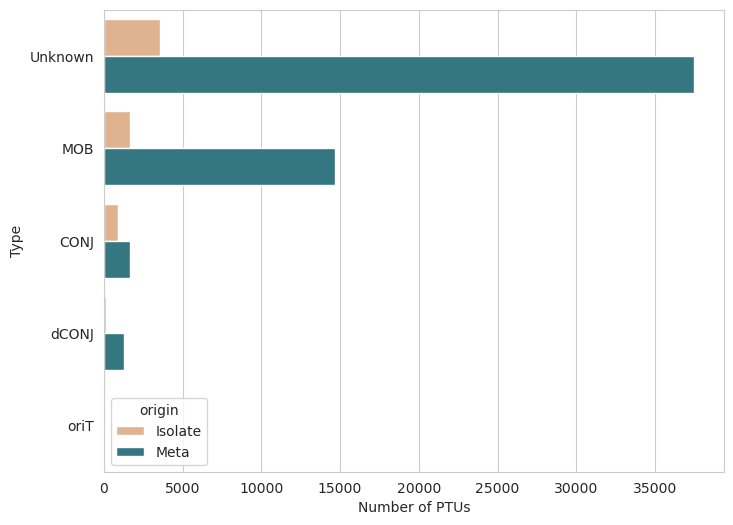

In [27]:
df_long = ptu_graph_df.stack().reset_index(name="count")
# Compute the total count per type and sort types from largest to smallest
order = df_long.groupby("type")["count"].sum().sort_values(ascending=False).index

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_long,
    x="count",
    y="type",
    hue="origin",
    order=order,
    palette={"Meta": "#277F8E", "Isolate": "#EDB183"},
    width=0.5,  # Adjusted bar width to be smaller
)
plt.xlabel("Number of PTUs")
plt.ylabel("Type")

plt.savefig("../figures/ptu_conjscan.pdf", bbox_inches="tight")


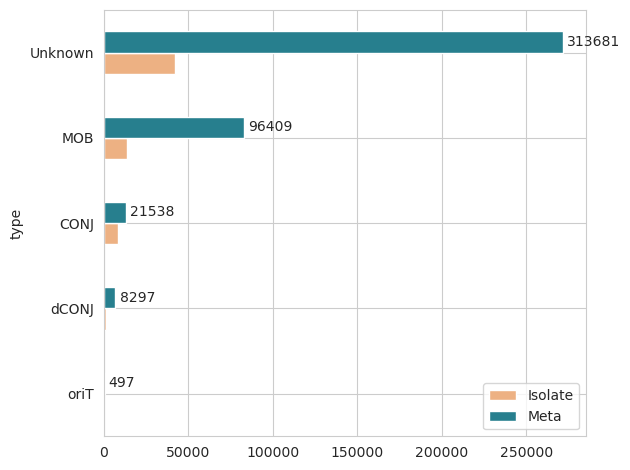

In [26]:
fig, ax = plt.subplots()
b = a.groupby(["type", "origin"]).size().unstack()
b["Total"] = b.sum(axis=1)

b.sort_values(by="Total").drop("Total", axis=1).plot(
    kind="barh", color=custom_palette[1::-1], ax=ax
)

ax.bar_label(ax.containers[1], labels=b.sort_values(by="Total")["Total"], padding=3)
ax.legend(loc="lower right")
plt.tight_layout()

plt.savefig("../figures/conj_distribution.pdf", bbox_inches="tight")

In [23]:
a

,replicon,MOB,CONJ,dCONJ,oriT,origin,length,type,ptu
0,2088090015|GPICI_8721071,1,0,0,0,Meta,9738,MOB,PTU-06613
1,2088090015|GPICI_8837489,1,0,0,0,Meta,10843,MOB,PTU-10109
2,2088090015|GPICI_8880022,1,0,0,0,Meta,25248,MOB,PTU-10109
3,2088090015|GPICI_8946463,1,0,0,0,Meta,9983,MOB,PTU-06613
4,2088090015|GPICI_9100369,1,0,0,0,Meta,9763,MOB,PTU-06613
...,...,...,...,...,...,...,...,...,...
98276,Refsoil_NZ_CP019368.1,0,0,0,0,Isolate,38808,Unknown,PTU-44534
98277,Refsoil_NZ_CP019369.1,0,0,0,0,Isolate,43228,Unknown,PTU-44533
98278,Refsoil_NZ_HF677572.1,0,0,0,0,Isolate,18169,Unknown,PTU-43307
98279,Refsoil_NZ_HG916854.1,0,0,0,0,Isolate,759787,Unknown,PTU-14282


In [24]:
a.groupby(["type", "origin"])["ptu"].nunique().unstack()

origin,Isolate,Meta
type,,
CONJ,906,1660
MOB,1656,14700
Unknown,3599,37485
dCONJ,152,1253
oriT,20,56


In [25]:
with open("../ptu_derep/meta_complete.txt") as f:
    complete = f.read().splitlines()

a["complete"] = a["replicon"].apply(
    lambda x: "PLSDB" in x or "Refsoil" in x or x in complete
)

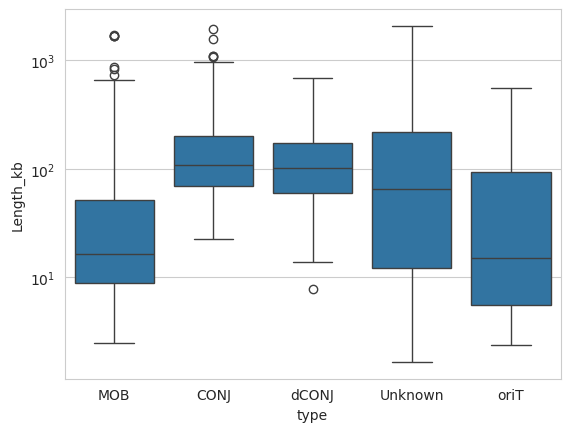

In [26]:
fig, ax = plt.subplots()
a["Length_kb"] = a["length"] / 1000
sns.boxplot(
    data=a[a["complete"] == True], x="type", y="Length_kb", log_scale=True, ax=ax
)
fig.savefig("../figures/conj_size.pdf", bbox_inches="tight")

In [27]:
# do kruskal wallis test
from scipy.stats import kruskal

mob, conj, dconj, unknown, orit = [
    a[(a["type"] == t) & (a["complete"] == True)]["Length_kb"].to_list()
    for t in ["MOB", "CONJ", "dCONJ", "Unknown", "oriT"]
]

kruskal(mob, conj, dconj, unknown, nan_policy="omit")

KruskalResult(statistic=435.0203910655408, pvalue=5.737360019471926e-94)

In [28]:
from scikit_posthocs import posthoc_dunn

data = [mob, conj, dconj, unknown, orit]

res = posthoc_dunn(data, p_adjust="holm")
res.index = ["MOB", "CONJ", "dCONJ", "Unknown", "oriT"]
res.columns = ["MOB", "CONJ", "dCONJ", "Unknown", "oriT"]
res[res < 0.05]

,MOB,CONJ,dCONJ,Unknown,oriT
MOB,NaN,3.770726e-87,1.784931e-11,4.263075e-35,NaN
CONJ,3.770726e-87,NaN,NaN,1.289020e-20,2.790130e-08
dCONJ,1.784931e-11,NaN,NaN,1.728512e-02,1.397353e-04
Unknown,4.263075e-35,1.289020e-20,1.728512e-02,NaN,8.753578e-03
oriT,NaN,2.790130e-08,1.397353e-04,8.753578e-03,NaN


In [ ]:
grouped["Total"].sum()

34703

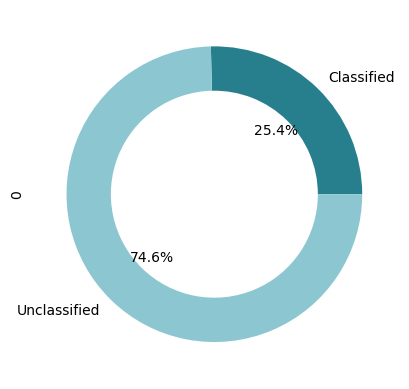

In [ ]:
fig, ax = plt.subplots()

pd.DataFrame.from_dict(
    {
        "Classified": df[(df["MOB"] > 0) | (df["CONJ"] > 0) | (df["dCONJ"] > 0)].shape[
            0
        ],
        "Unclassified": df.shape[0]
        - df[(df["MOB"] > 0) | (df["CONJ"] > 0) | (df["dCONJ"] > 0)].shape[0],
    },
    orient="index",
).plot(
    kind="pie",
    subplots=True,
    legend=False,
    autopct="%1.1f%%",
    figsize=(5, 5),
    colors=[custom_palette[0], "#8CC7D1"],
    wedgeprops=dict(width=0.3),
    ax=ax,
)

fig.savefig("../figures/classification_distribution.pdf", bbox_inches="tight")

In [ ]:
no_class = df[(df["MOB"] == 0) & (df["CONJ"] == 0) & (df["dCONJ"] == 0)]

no_class.head()

,MOB,T4SS_typeB,T4SS_typeC,T4SS_typeF,T4SS_typeFA,T4SS_typeFATA,T4SS_typeG,T4SS_typeI,T4SS_typeT,dCONJ_typeB,...,orit,ptu,host,p__,c__,o__,f__,g__,CONJ,dCONJ
replicon,,,,,,,,,,,,,,,,,,,,,
2088090014|GPIPI_16557027,0,0,0,0,0,0,0,0,0,0,...,False,PTU-04734,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,p__Pseudomonadota,c__Alphaproteobacteria,o__Rhizobiales,f__Methyloligellaceae,g__Methyloceanibacter,0,0
2088090014|GPIPI_16884012,0,0,0,0,0,0,0,0,0,0,...,False,PTU-25861,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2088090014|GPIPI_16944593,0,0,0,0,0,0,0,0,0,0,...,False,PTU-58143,d__Bacteria;p__Acidobacteriota;c__Vicinamibact...,p__Acidobacteriota,c__Vicinamibacteria,o__Vicinamibacterales,f__UBA2999,g__2-02-FULL-65-29,0,0
2088090014|GPIPI_17035422,0,0,0,0,0,0,0,0,0,0,...,False,PTU-25860,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2088090014|GPIPI_17320127,0,0,0,0,0,0,0,0,0,0,...,False,PTU-10158,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
no_class[no_class["orit"]].shape

(143, 29)

In [ ]:
no_class[no_class["orit"]].groupby("ptu").nunique()

,MOB,T4SS_typeB,T4SS_typeC,T4SS_typeF,T4SS_typeFA,T4SS_typeFATA,T4SS_typeG,T4SS_typeI,T4SS_typeT,dCONJ_typeB,...,novelty,orit,host,p__,c__,o__,f__,g__,CONJ,dCONJ
ptu,,,,,,,,,,,,,,,,,,,,,
PTU-00084,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PTU-01339,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PTU-01419,1,1,1,1,1,1,1,1,1,1,...,1,1,3,1,1,1,1,3,1,1
PTU-01627,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,1,1
PTU-02129,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTU-54770,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PTU-56067,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
PTU-57151,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
grouped["Total"].sum()

34703

In [ ]:
for i in grouped.index:
    print(i, round(df[df[i] >= 1].shape[0] / grouped["Total"].sum(), 2))

MOB 0.81
CONJ 0.12
dCONJ 0.07


In [ ]:
df_p_counts = df["p__"].value_counts()
df["new_p__"] = df["p__"].apply(
    lambda x: (
        "Unknown"
        if pd.isnull(x)
        else x.split("p__")[1]
        if df_p_counts[x] > 250
        else "Other"
    )
)

df_o_counts = df["o__"].value_counts()
df["new_o__"] = df["o__"].apply(
    lambda x: (
        "Unknown"
        if pd.isnull(x)
        else x.split("o__")[1]
        if df_o_counts[x] > 3500
        else "Other"
    )
)

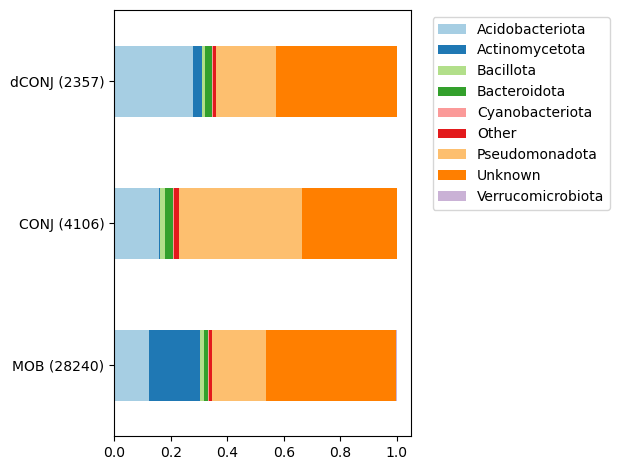

In [ ]:
fig, ax = plt.subplots()
df_for_graph = df.groupby("new_p__").sum()[["MOB", "CONJ", "dCONJ"]].transpose()
df_for_graph.apply(lambda x: x / x.sum(), axis=1).plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=sns.color_palette("Paired", df["new_p__"].nunique()),
)

ax.set_yticklabels(
    [f"{x.get_text()} ({df[x.get_text()].sum()})" for x in ax.get_yticklabels()]
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

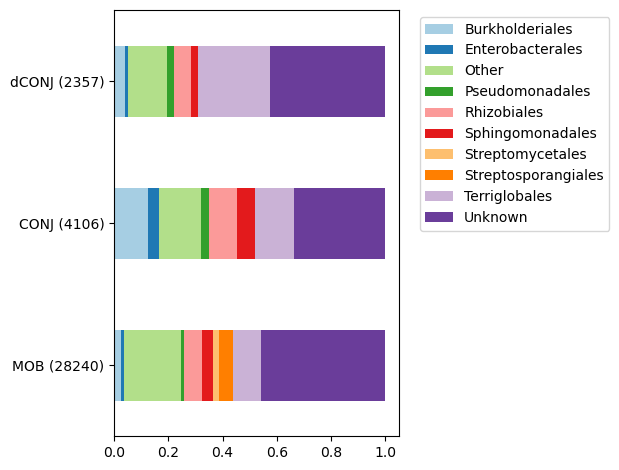

In [ ]:
fig, ax = plt.subplots()
df_for_graph = df.groupby("new_o__").sum()[["MOB", "CONJ", "dCONJ"]].transpose()
df_for_graph.apply(lambda x: x / x.sum(), axis=1).plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=sns.color_palette("Paired", df["new_o__"].nunique()),
)

ax.set_yticklabels(
    [f"{x.get_text()} ({df[x.get_text()].sum()})" for x in ax.get_yticklabels()]
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

In [ ]:
no_class[no_class["orit"]].groupby("ptu").size()

ptu
PTU-00084    30
PTU-01339     4
PTU-01419     3
PTU-01627     1
PTU-02129     5
             ..
PTU-54770     1
PTU-56067     1
PTU-57151     1
PTU-57173     1
PTU-57948     1
Length: 88, dtype: int64

In [ ]:
df["taxon_oid"] = df.reset_index()["replicon"].apply(
    lambda x: x.split("|")[0] if "IMGPR" not in x else x.split("_")[2]
)

In [ ]:
df["MOB"].sum()

28240

## Plasmid types per environment

In [ ]:
df_countries = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")
df_countries["taxon_oid"] = df_countries["taxon_oid"].astype(str)

df_countries.head()

,taxon_oid,Ecosystem Subtype,Geographic Location,Isolation Country,Latitude,Longitude,Origin,Plasmid Count,Ecosystem Subtype Custom,PTU Count
0,3300044459,Watershed,"USA: East River, Colorado",United States of America,38.97700,-107.06640,Meta,2.0,Other,2.0
1,3300046473,Rhizosphere,"USA: Clatskanie, Oregon",United States of America,46.12090,-123.27150,Meta,50.0,Rhizosphere,22.0
2,3300027907,Rhizosphere,USA: Tennessee,United States of America,35.84440,-83.95990,Meta,35.0,Rhizosphere,29.0
3,3300052899,Temperate forest,USA: Colorado,United States of America,39.94414,-105.93544,Meta,6.0,Temperate forest,6.0
4,3300046483,Peat,"Sweden: Norrbotten County, Stordalen Mire",Sweden,68.35480,19.04340,Meta,1.0,Peat,1.0


In [ ]:
df = df.set_index("taxon_oid").join(df_countries.set_index("taxon_oid")).reset_index()

/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/soil_metagenomes/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [ ]:
df.groupby("Ecosystem Subtype Custom").sum()

,taxon_oid,MOB,T4SS_typeB,T4SS_typeC,T4SS_typeF,T4SS_typeFA,T4SS_typeFATA,T4SS_typeG,T4SS_typeI,T4SS_typeT,...,dCONJ_typeFATA,dCONJ_typeG,dCONJ_typeI,dCONJ_typeT,CONJ,dCONJ,Latitude,Longitude,Plasmid Count,PTU Count
Ecosystem Subtype Custom,,,,,,,,,,,,,,,,,,,,,


IndexError: index 0 is out of bounds for axis 0 with size 0

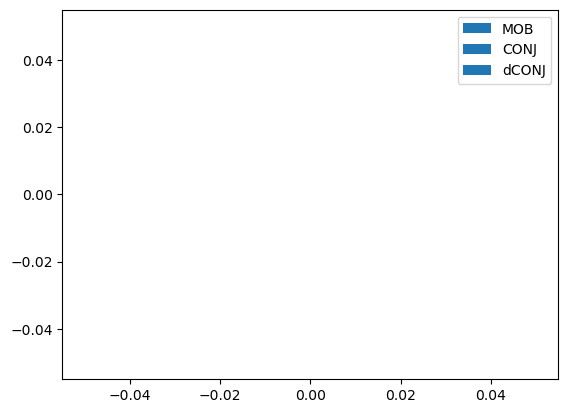

In [ ]:
fig, ax = plt.subplots()
df.groupby("Ecosystem Subtype Custom").sum()[["MOB", "CONJ", "dCONJ"]].apply(
    lambda x: x / x.sum(), axis=1
).plot(kind="barh", stacked=True, ax=ax, color=custom_palette)

# fix
# ax.set_yticklabels(
#     [
#         f'{x.get_text()} ({df["Ecosystem Subtype Custom"][df["Ecosystem Subtype Custom"]==x.get_text()].count()})'
#         for x in ax.get_yticklabels()
#     ]
# )

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

In [ ]:
df.groupby("Ecosystem Subtype Custom").sum().iloc[:, 0:17].apply(
    lambda x: x / x.sum(), axis=1
).plot(kind="barh", stacked=True)

KeyError: 'Ecosystem Subtype Custom'